Name: Aishwarya Vivek Bhavsar
CSULB ID: 029371509
CECS 551 Assignment 1 - Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
raw = fetch_california_housing()
vectorizer = TfidfVectorizer()

X = raw.data
y = raw.target
# Show feature names
pprint(list(raw.feature_names))

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']


In [2]:
# Show dataset description
print(raw.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# Show dimension of X
print(raw.data.shape)

(20640, 8)


In [4]:
# Show dimension of y
print(raw.target.shape)

(20640,)


In [5]:
# Split X, y into X_train, X_test, y_train, y_test with 7:3 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#t = max(X_train)
#print(t)
#type(X_train)
#print(X_train.ndim)
#[X_train[0] for i in X_train]

#print("TRAINING" , X_train)
#print("TESTING", X_test)

In [6]:
# Build a linear regression model with X_train, y_train
reg = LinearRegression()      #impose a linear regression. 
reg.fit(X_train, y_train)     #this will shape the model using one predictor. We use fit() to train our model.
print(reg.score(X_test, y_test))

0.6139951151748542


In [7]:
# pridict y_pred from X_test
#predict() uses the learned parameters from fit() and performs predictions on the unseen, test datapoints on each instance.
y_pred = reg.predict(np.array(X_test))  

print(y_pred)
print(sqrt(mean_squared_error(y_test,y_pred)))
print((r2_score(y_test,y_pred)))

[2.11532804 1.54082385 1.89245758 ... 2.23750302 2.31435565 0.81096116]
0.725707380639667
0.6139951151748542


In [8]:
# show coefficients of the features and find the argmax of coefficients
#print("array(",reg.coef_,")")
reg.coef_

array([ 4.35999973e-01,  9.19351259e-03, -1.11365790e-01,  6.11671735e-01,
       -5.10567461e-06, -4.16210012e-03, -4.17361064e-01, -4.28305550e-01])

In [9]:
#find argmax of coefficients
p = np.argmax(reg.coef_, axis = None, out = None)
print(p)

3


(2.0, 15.0)

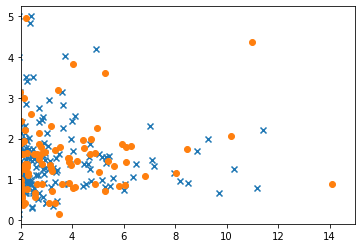

In [10]:
# Draw scatter plots of 
#             max coefficient feature of X_train - y_train as 'x' marker
#             max coefficient feature of X_test - y_test as 'o' marker
# xlim(2,10)
x = X_train[:,3]
y = X_test[:,3]
plt.scatter(x,y_train,marker='x')
plt.scatter(y,y_test)
plt.xlim(2,15)